### Contents

- [EDA](#EDA)

### Import Data

In [1]:
# user configuration

In [2]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# html
from IPython.display import Image
from IPython.core.display import HTML

# others
import datetime as dt
#import re
#import os

In [3]:
# file paths

input_path = '../data/1_input/'
clean_path = '../data/2_clean/'
preprocess_path = '../data/3_preprocess/'
output_path = '../data/4_output/'

folders = ['Fitabase Data 3.12.16-4.11.16','Fitabase Data 4.12.16-5.12.16']

In [4]:
# import clean data

df_activity = pd.read_csv(clean_path + 'activity.csv')
df_weight = pd.read_csv(clean_path + 'weight.csv')

df_sec = pd.read_csv(clean_path + 'seconds.csv')
df_min = pd.read_csv(clean_path + 'minutes.csv')
df_hr = pd.read_csv(clean_path + 'hours.csv')

### Functions

### Explore df_activity

### Explore df_weight

In [5]:
# bmi < 18.5: underweight
# 18.5 <= bmi < 25: normal weight
# 25.0 <= bmi < 30: overweight
# bmi >= 30.0: obese

cols = ['height',18.5,25.0,30.0]
df_bmi = pd.DataFrame(columns=cols)

df_bmi['height'] = range(150,201,1)

In [6]:
# bmi = weight / height^2
# weight = bmi * height^2
df_bmi[cols[1]] = cols[1] * (df_bmi[cols[0]]/100)**2
df_bmi[cols[2]] = cols[2] * (df_bmi[cols[0]]/100)**2
df_bmi[cols[3]] = cols[3] * (df_bmi[cols[0]]/100)**2

df_bmi.reset_index(inplace=True)
#df_bmi

In [7]:
cols = ['height','weight','bmi']
df_weight_id = df_weight.groupby('id')[cols].mean()

df_weight_id.sort_values(by='bmi',ascending=False,inplace=True)
df_weight_id.reset_index(inplace=True)
df_weight_id

,id,height,weight,bmi
0,5,167.541571,129.600006,46.169998
1,18,162.457567,92.400002,35.009998
2,31,159.949231,75.599998,29.549999
3,19,159.909705,69.400002,27.139999
4,20,195.408806,99.699997,26.110001
5,35,182.747972,85.755556,25.677778
6,11,187.929823,88.400002,25.030001
7,9,159.985870,63.400002,24.770000
8,27,160.035371,61.864286,24.155000
9,1,152.329182,53.299999,22.969999


BMI Range: Num of People
Obese Weight: 2
Over Weight: 5
Normal Weight: 4
Under Weight: 0


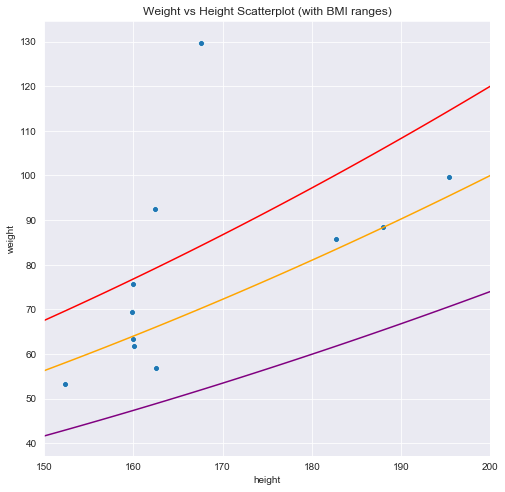

In [8]:
plt.figure(figsize=(8,8))
plt.xlim(150,200)
plt.yticks(range(40,141,10))
plt.title('Weight vs Height Scatterplot (with BMI ranges)')

cols = ['height',18.5,25.0,30.0]

sns.lineplot(data=df_bmi,x='height',y=cols[3],color='red')
sns.lineplot(data=df_bmi,x='height',y=cols[2],color='orange')
sns.lineplot(data=df_bmi,x='height',y=cols[1],color='purple')

sns.scatterplot(data=df_weight_id,x='height',y='weight')

print('BMI Range: Num of People')
print('Obese Weight: 2')
print('Over Weight: 5')
print('Normal Weight: 4')
print('Under Weight: 0')

### Explore df_seconds

### Explore df_minutes

### Explore df_hours

In [9]:
print(df_hr.shape)
df_hr.head()

(24084, 6)


,id,timestamp,steps,calories,intensity_total,intensity_avg
0,1,3/12/2016 12:00:00 AM,0,48,0,0.0
1,1,3/12/2016 1:00:00 AM,0,48,0,0.0
2,1,3/12/2016 2:00:00 AM,0,48,0,0.0
3,1,3/12/2016 3:00:00 AM,0,48,0,0.0
4,1,3/12/2016 4:00:00 AM,0,48,0,0.0


Seems that Id_10 is active throughout the day but does less aeroic exercises.


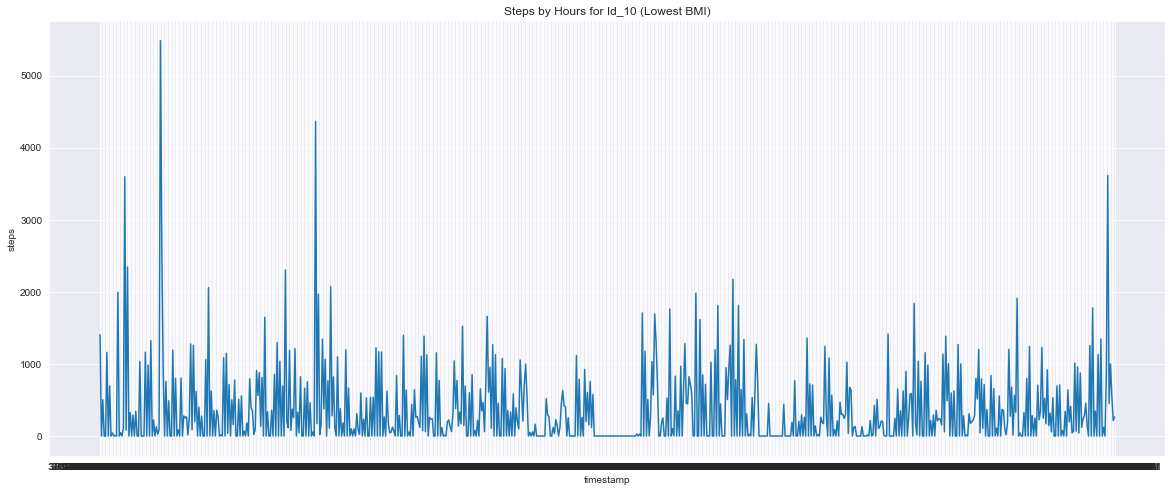

In [14]:
mask_id = df_hr['id'] == 10
df_hr_id = df_hr[mask_id]

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id_10 (Lowest BMI)')

sns.lineplot(data=df_hr_id,x='timestamp',y='steps');

print('Seems that Id_10 is active throughout the day but does less aeroic exercises.')

Seems that Id_5 is a sedentary person for most time in a day but does more aeroic exercises (to lost weight?).


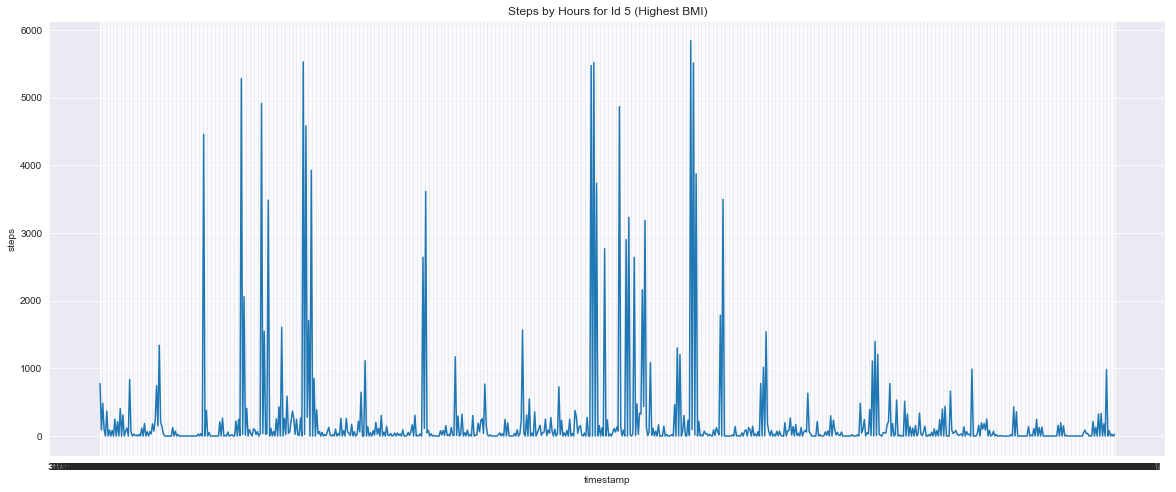

In [15]:
mask_id = df_hr['id'] == 5
df_hr_id = df_hr[mask_id]

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id 5 (Highest BMI)')

sns.lineplot(data=df_hr_id,x='timestamp',y='steps')

print('Seems that Id_5 is a sedentary person for most time in a day but does more aeroic exercises (to lost weight?).')

Seems that Id_5 is a sedentary person for most time in a day but does more aeroic exercises (to lost weight?).


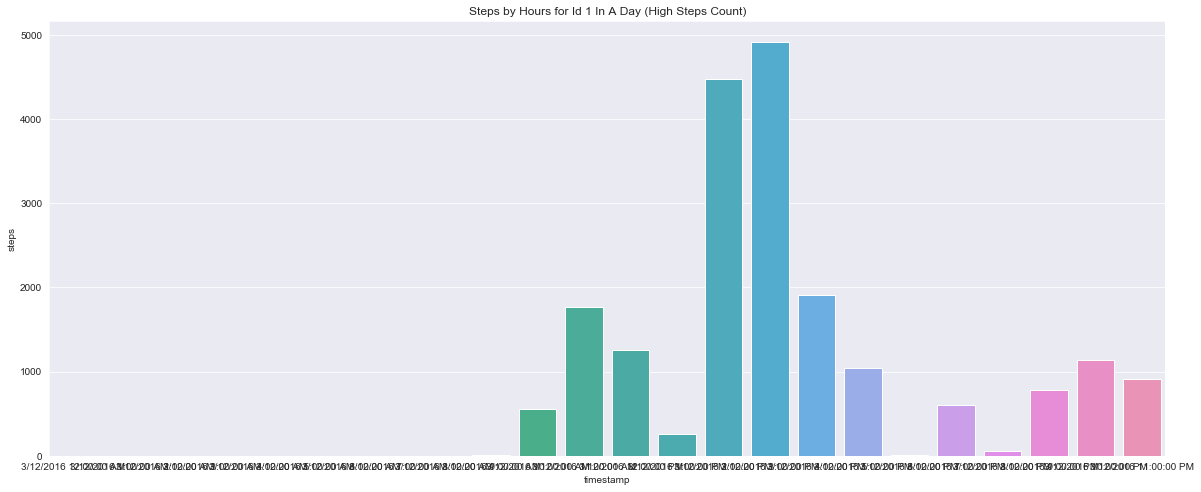

In [28]:
mask_id = df_hr['id'] == 1
mask_dt = df_hr['timestamp'].str.find('3/12/2016') == 0
mask_dt

df_hr_id = df_hr[mask_id & mask_dt]  

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id 1 In A Day (High Steps Count)')

sns.barplot(data=df_hr_id,x='timestamp',y='steps')

print('Seems that Id_5 is a sedentary person for most time in a day but does more aeroic exercises (to lost weight?).')